In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df = pd.read_csv('kc_house_data.csv')
df = df[['sqft_living', 'price']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21613 non-null  int64  
 1   price        21613 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 337.8 KB


In [68]:
sqft_living = np.array(df['sqft_living'])
price = np.array(df['price'])

sqft_living = sqft_living.reshape(-1,1)
price = price.reshape(-1,1)


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sqft_living, price, test_size=0.8,random_state=0)

In [70]:
def magnitude(x, y):
    return (x ** 2 + y ** 2)

In [123]:
learning_rate = 0.00000001
epochs = 500
x = X_train
y = y_train
n = len(X_train)

theta_0 = 0
theta_1 = 1

cost_history = []

d_0 = d_1 = np.inf
theta_delta = np.inf
d_tolerance = 0.0001

for i in range(epochs):

    pred = theta_0 + theta_1 * x

    cost_history.append(np.sum((pred - y) ** 2) * (1 / n))

    temp_d_0 = np.sum(y - pred) * (-1 / n) 
    temp_d_1 = np.sum((y - pred) * x) * (-1 / n) 

    theta_delta = magnitude(temp_d_0 - d_0, temp_d_1 - d_1)

    if theta_delta < d_tolerance:
        break

    d_0 = temp_d_0
    d_1 = temp_d_1

    theta_0 = theta_0 - d_0 * learning_rate
    theta_1 = theta_1 - d_1 * learning_rate

print('theta_0: {}, theta_1: {}'.format(theta_0, theta_1))


theta_0: 0.10201281624332112, theta_1: 259.49385573680235


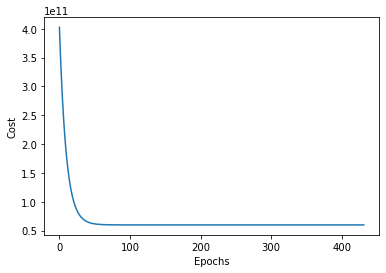

In [124]:
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.plot(cost_history)

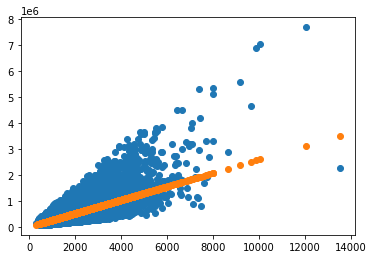

In [127]:
y_pred = theta_0 + theta_1 * X_test

plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)

In [125]:
pred_x = 900
prediction = theta_0 + theta_1 * pred_x

print('Price prediction @ {} sqft: {}'.format(pred_x, prediction))

Price prediction @ 900 sqft: 233544.57217593835
